In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_digits

In [3]:
digits=load_digits() #importing digits data

In [4]:
digits.data.shape # 1797 images of 8 X 8 dimensionalatiy

(1797, 64)

In [5]:
pd.value_counts(digits.target) # all variables

3    183
5    182
1    182
6    181
4    181
9    180
7    179
0    178
2    177
8    174
dtype: int64

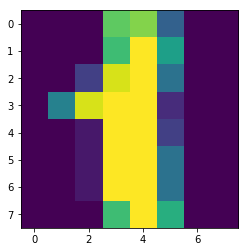

In [7]:
plt.imshow(digits.images[1])

In [8]:
# how to split data into train data and test data 
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,y_train,y_test=train_test_split(digits.data,digits.target,test_size=0.20,random_state=123)

In [10]:
X_train.shape

(1437, 64)

In [11]:
y_train.shape

(1437,)

In [12]:
from sklearn.linear_model import LogisticRegression

In [14]:
LR=LogisticRegression(multi_class='multinomial',solver='lbfgs')

In [15]:
logregmodel=LR.fit(X_train,y_train)

In [17]:
logregmodel.score(X_train,y_train)

1.0

In [20]:
logregpredict=LR.predict(X_test)

In [21]:
pd.crosstab(y_test,logregpredict)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,39,0,0,0,0,0,0,0,0,0
1,0,34,0,0,0,0,0,0,0,0
2,0,0,36,0,0,0,0,0,0,0
3,0,0,0,33,0,0,0,0,0,0
4,0,0,0,0,41,0,0,1,0,0
5,0,1,1,0,1,33,0,0,0,1
6,0,1,0,0,0,1,41,0,0,0
7,0,0,0,0,0,0,0,31,0,0
8,0,4,0,0,0,0,0,0,33,0


In [23]:
(39+34+36+33+41+33+41+31+33+28)/y_test.shape[0] #Diagonal values are correct values

0.9694444444444444

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
DecTree=DecisionTreeClassifier()

In [27]:
dectreemodel=DecTree.fit(X_train,y_train)

In [28]:
dectreemodel.score(X_train,y_train)

1.0

In [30]:
dectreepredict=dectreemodel.predict(X_test)

In [34]:
pd.crosstab(y_test,dectreepredict)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,36,0,1,0,0,0,0,0,2,0
1,0,29,2,2,0,0,0,0,0,1
2,0,2,30,2,0,0,1,0,1,0
3,0,1,1,27,0,0,0,1,2,1
4,0,1,0,0,36,0,0,2,0,3
5,0,0,1,1,1,28,2,0,1,3
6,0,0,0,1,2,0,39,0,1,0
7,0,0,0,1,0,0,0,29,0,1
8,0,4,2,4,0,0,0,1,26,0


In [33]:
(36+29+30+27+36+28+39+29+26+23)/y_test.shape[0]

0.8416666666666667

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
RF=RandomForestClassifier(n_estimators=5000)

In [46]:
rfmodel=RF.fit(X_train,y_train)

In [47]:
rfmodel.score(X_train,y_train)

1.0

In [48]:
rfpredict=rfmodel.predict(X_test)

In [49]:
pd.crosstab(y_test,rfpredict)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,39,0,0,0,0,0,0,0,0,0
1,0,34,0,0,0,0,0,0,0,0
2,0,0,36,0,0,0,0,0,0,0
3,0,0,0,33,0,0,0,0,0,0
4,0,0,0,0,41,0,0,1,0,0
5,0,0,0,0,1,35,0,0,0,1
6,0,0,0,0,1,0,42,0,0,0
7,0,0,0,0,0,0,0,31,0,0
8,0,3,1,0,0,0,0,0,33,0


In [50]:
(39+34+36+33+41+35+42+31+33+28)/y_test.shape[0]

0.9777777777777777

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
GB=GradientBoostingClassifier(n_estimators=5000)

In [53]:
gbmodel=GB.fit(X_train,y_train)

In [54]:
gbmodel.score(X_train,y_train)

1.0

In [55]:
gbpredict=gbmodel.predict(X_test)

In [56]:
pd.crosstab(y_test,gbpredict)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,38,0,0,0,0,0,1,0,0,0
1,0,34,0,0,0,0,0,0,0,0
2,0,0,33,0,0,0,0,2,1,0
3,0,0,0,33,0,0,0,0,0,0
4,0,1,0,0,40,0,0,1,0,0
5,0,0,0,0,0,33,0,0,0,4
6,0,1,0,0,0,1,41,0,0,0
7,0,0,0,0,0,0,0,31,0,0
8,0,2,0,0,0,0,0,0,35,0


In [57]:
(38+34+33+33+40+33+41+31+35+28)/y_test.shape[0]

0.9611111111111111

In [58]:
from sklearn.neural_network import MLPClassifier

In [65]:
mlp=MLPClassifier(activation='relu',hidden_layer_sizes=(100,))

In [66]:
mlpmodel=mlp.fit(X_train,y_train)

In [67]:
mlpmodel.score(X_train,y_train)

1.0

In [68]:
mlppredict=mlpmodel.predict(X_test)

In [69]:
pd.crosstab(y_test,mlppredict)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,39,0,0,0,0,0,0,0,0,0
1,0,34,0,0,0,0,0,0,0,0
2,0,1,34,1,0,0,0,0,0,0
3,0,0,0,33,0,0,0,0,0,0
4,0,0,0,0,42,0,0,0,0,0
5,0,0,0,0,2,34,0,0,0,1
6,0,0,0,0,1,0,42,0,0,0
7,0,0,0,0,0,0,0,31,0,0
8,0,4,0,1,0,0,0,0,32,0


In [70]:
(39+34+34+33+42+34+41+31+34+28)/y_test.shape[0]

0.9722222222222222

In [72]:
from sklearn.neighbors import KNeighborsClassifier

In [73]:
KNN=KNeighborsClassifier()

In [74]:
KNNmodel=KNN.fit(X_train,y_train)

In [75]:
KNNmodel.score(X_train,y_train)

0.9902574808629089

In [76]:
KNNpredict=KNNmodel.predict(X_test)

In [77]:
pd.crosstab(y_test,KNNpredict)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,39,0,0,0,0,0,0,0,0,0
1,0,34,0,0,0,0,0,0,0,0
2,0,0,36,0,0,0,0,0,0,0
3,0,0,0,33,0,0,0,0,0,0
4,0,0,0,0,41,0,0,1,0,0
5,0,0,0,0,0,36,0,0,0,1
6,0,0,0,0,0,0,43,0,0,0
7,0,0,0,0,0,0,0,31,0,0
8,0,3,1,0,0,0,0,0,33,0


In [78]:
(39+34+36+33+41+36+43+31+33+27)/y_test.shape[0]

0.9805555555555555

In [79]:
from sklearn.svm import SVC # both for classification and regression

In [90]:
Supportvect=SVC(kernel='linear')

In [91]:
supvecmodel=Supportvect.fit(X_train,y_train)

In [92]:
supvecmodel.score(X_train,y_train)

1.0

In [93]:
svcpredict=supvecmodel.predict(X_test)

In [95]:
pd.crosstab(y_test,svcpredict)

col_0,0,1,2,3,4,5,6,7,8,9
row_0,,,,,,,,,,
0,39,0,0,0,0,0,0,0,0,0
1,0,34,0,0,0,0,0,0,0,0
2,0,0,36,0,0,0,0,0,0,0
3,0,0,0,33,0,0,0,0,0,0
4,0,0,0,0,42,0,0,0,0,0
5,0,0,0,0,0,35,0,1,0,1
6,0,1,0,0,0,0,42,0,0,0
7,0,0,0,0,0,0,0,31,0,0
8,0,4,0,0,0,0,0,0,33,0


In [97]:
(39+34+36+33+42+35+42+31+33+27)/y_test.shape[0]

0.9777777777777777